## Estudo das bases - Previsão de Demanda
#### Curso Planejamento e Controle de Produção(PCP)

### Import das bases

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('./02_bases de casos exemplo planejamento de demanda.xlsx', sheet_name='3 Procon Fone')
df.head(5)

,Data Abertura,Data Encerramento,Motivo,semana do ano,dia da semana
0,2009-01-05,2009-04-08,ENCARGOS/TARIFAS,2,2
1,2009-01-05,2009-04-06,CANCELAMENTO,2,2
2,2009-01-05,2009-02-05,ENCARGOS/TARIFAS,2,2
3,2009-01-05,2009-01-30,RESTRIÇÕES CREDITÍCIAS,2,2
4,2009-01-05,2009-01-27,CANCELAMENTO,2,2


## Exploração inicial da base

In [3]:
df.describe()

,semana do ano,dia da semana
count,7213.000000,7213.000000
mean,26.519617,3.985998
std,13.885528,1.393750
min,2.000000,2.000000
25%,15.000000,3.000000
50%,26.000000,4.000000
75%,38.000000,5.000000
max,53.000000,6.000000


In [4]:
df.head(5)

,Data Abertura,Data Encerramento,Motivo,semana do ano,dia da semana
0,2009-01-05,2009-04-08,ENCARGOS/TARIFAS,2,2
1,2009-01-05,2009-04-06,CANCELAMENTO,2,2
2,2009-01-05,2009-02-05,ENCARGOS/TARIFAS,2,2
3,2009-01-05,2009-01-30,RESTRIÇÕES CREDITÍCIAS,2,2
4,2009-01-05,2009-01-27,CANCELAMENTO,2,2


In [5]:
df.dtypes

Data Abertura        datetime64[ns]
Data Encerramento    datetime64[ns]
Motivo                       object
semana do ano                 int64
dia da semana                 int64
dtype: object

In [6]:
pd.to_datetime(df['Data Abertura'], format="%m/%d/%Y")

0      2009-01-05
1      2009-01-05
2      2009-01-05
3      2009-01-05
4      2009-01-05
          ...    
7208   2009-12-30
7209   2009-12-30
7210   2009-12-30
7211   2009-12-31
7212   2009-12-31
Name: Data Abertura, Length: 7213, dtype: datetime64[ns]

In [7]:
pd.to_datetime(df['Data Encerramento'], format="%m/%d/%Y")

0      2009-04-08
1      2009-04-06
2      2009-02-05
3      2009-01-30
4      2009-01-27
          ...    
7208   2010-01-04
7209   2010-01-04
7210   2009-12-30
7211   2010-01-15
7212   2010-01-14
Name: Data Encerramento, Length: 7213, dtype: datetime64[ns]

In [8]:
df['Data Abertura'].dtypes

dtype('<M8[ns]')

In [9]:
df['Data Encerramento'].dtypes

dtype('<M8[ns]')

In [10]:
df.columns

Index(['Data Abertura', 'Data Encerramento', 'Motivo', 'semana do ano',
       'dia da semana'],
      dtype='object')

In [11]:
df.head()

,Data Abertura,Data Encerramento,Motivo,semana do ano,dia da semana
0,2009-01-05,2009-04-08,ENCARGOS/TARIFAS,2,2
1,2009-01-05,2009-04-06,CANCELAMENTO,2,2
2,2009-01-05,2009-02-05,ENCARGOS/TARIFAS,2,2
3,2009-01-05,2009-01-30,RESTRIÇÕES CREDITÍCIAS,2,2
4,2009-01-05,2009-01-27,CANCELAMENTO,2,2


In [12]:
contagem_motivos = df['Data Abertura'].value_counts().sort_index().reset_index()
contagem_motivos

,index,Data Abertura
0,2009-01-05,25
1,2009-01-06,19
2,2009-01-07,26
3,2009-01-08,30
4,2009-01-09,21
...,...,...
243,2009-12-23,12
244,2009-12-28,16
245,2009-12-29,23
246,2009-12-30,17


In [13]:
datas_abertura = df['Data Abertura'].unique()
df_datas_abertura = pd.DataFrame(datas_abertura,columns=['Data Abertura'])
df_datas_abertura

,Data Abertura
0,2009-01-05
1,2009-01-06
2,2009-01-07
3,2009-01-08
4,2009-01-09
...,...
243,2009-12-23
244,2009-12-28
245,2009-12-29
246,2009-12-30


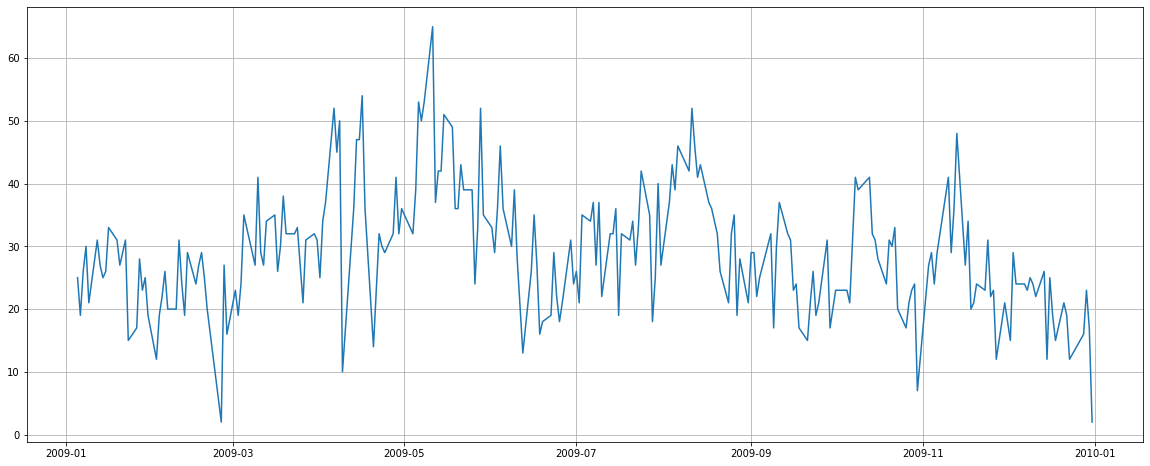

In [14]:
ax = plt.figure(figsize=(20,8))
plt.plot(contagem_motivos['index'], contagem_motivos['Data Abertura'])
plt.grid(True)
plt.show()

## Explorando os Motivos da base Procon Fone

In [15]:
df['Motivo'].isnull().value_counts().reset_index()

,index,Motivo
0,False,7054
1,True,159


In [16]:
df['Motivo'].fillna('N/A', inplace=True)


In [17]:
df['Motivo'].isnull().value_counts().reset_index()

,index,Motivo
0,False,7213


In [18]:
motivos = df['Motivo'].value_counts().sort_values(ascending=False).reset_index()
motivos

,index,Motivo
0,CANCELAMENTO,1594
1,CONTESTAÇÕES,1305
2,ALGO NÃO SOLICITADO,1254
3,ENCARGOS/TARIFAS,1051
4,FRAUDE,887
5,ATENDIMENTO,405
6,ENTREGA DE TANGÍVEIS,305
7,N/A,159
8,DOCUMENTOS,151
9,RESTRIÇÕES CREDITÍCIAS,102


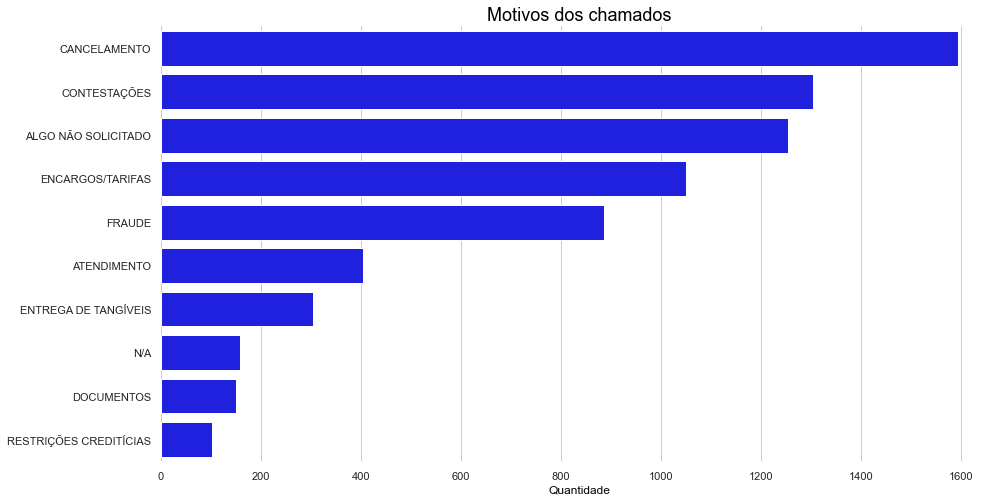

In [96]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
plt.figure(figsize=(15,8))
g = sns.barplot(x="Motivo", y="index", data=motivos, color='blue')
g.set_title('Motivos dos chamados', fontsize=18,color="black",alpha=1)
g.set_xlabel("Quantidade", size = 12,color="black")
g.set_ylabel("", size = 12,color="black")
sns.despine(left=True, bottom=True)
plt.show()

### Motivos - histórico

In [ ]:
g = sns.barplot(x="", y="Motivo", data=df, color='blue')
g.set_title('Motivos dos chamados', fontsize=18,color="black",alpha=1)
g.set_xlabel("Quantidade", size = 12,color="black")
g.set_ylabel("", size = 12,color="black")
sns.despine(left=True, bottom=True)
plt.show()